In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


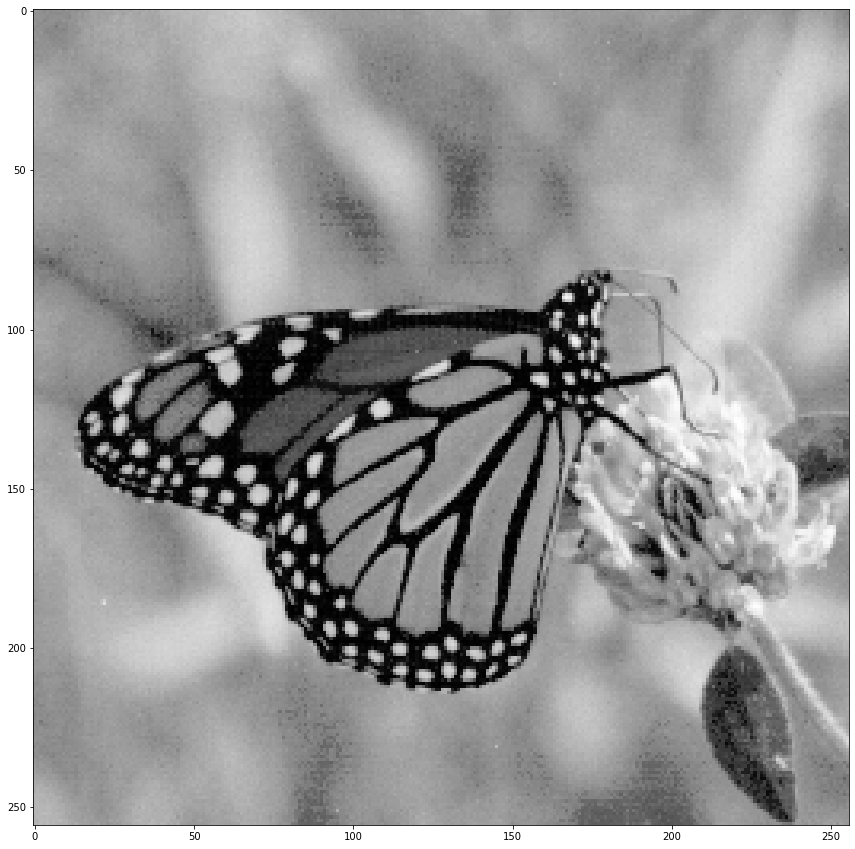

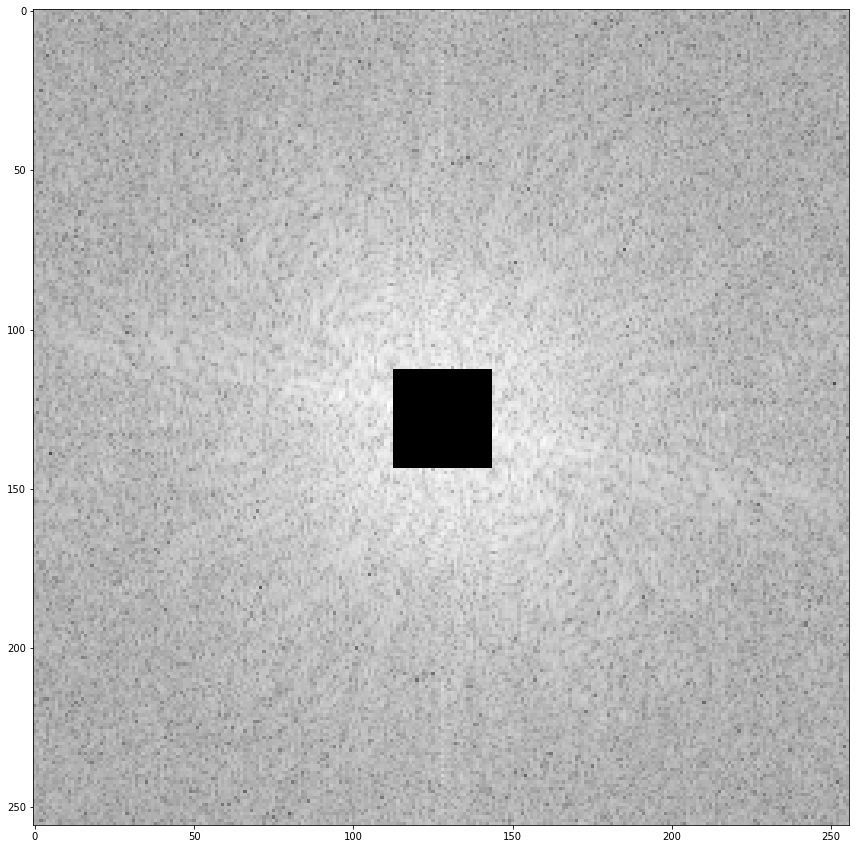

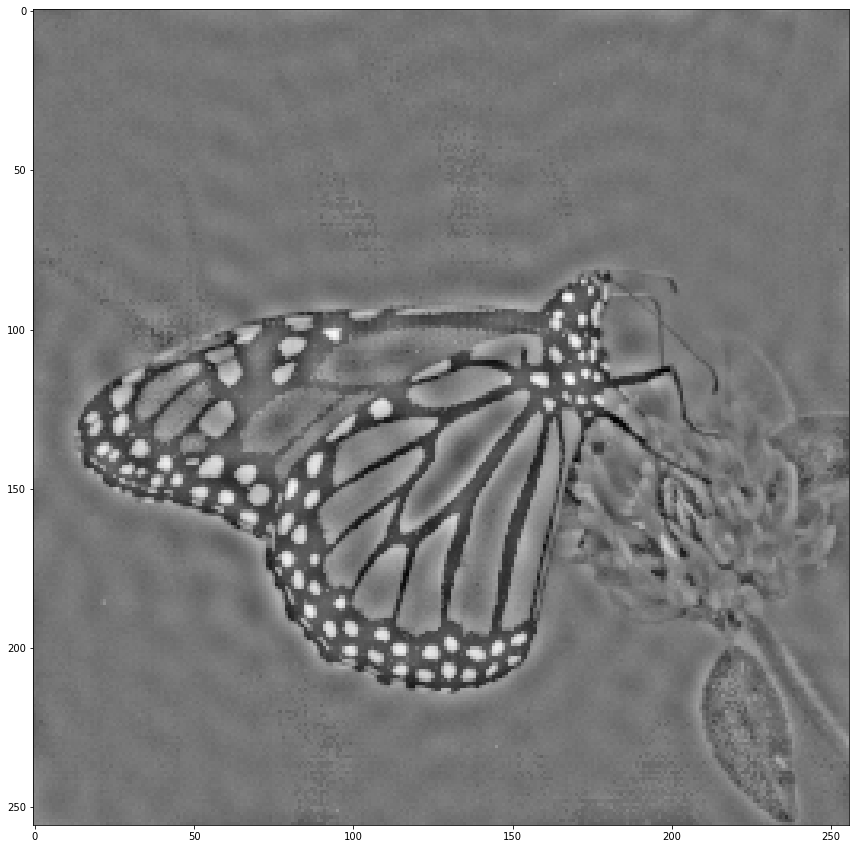

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


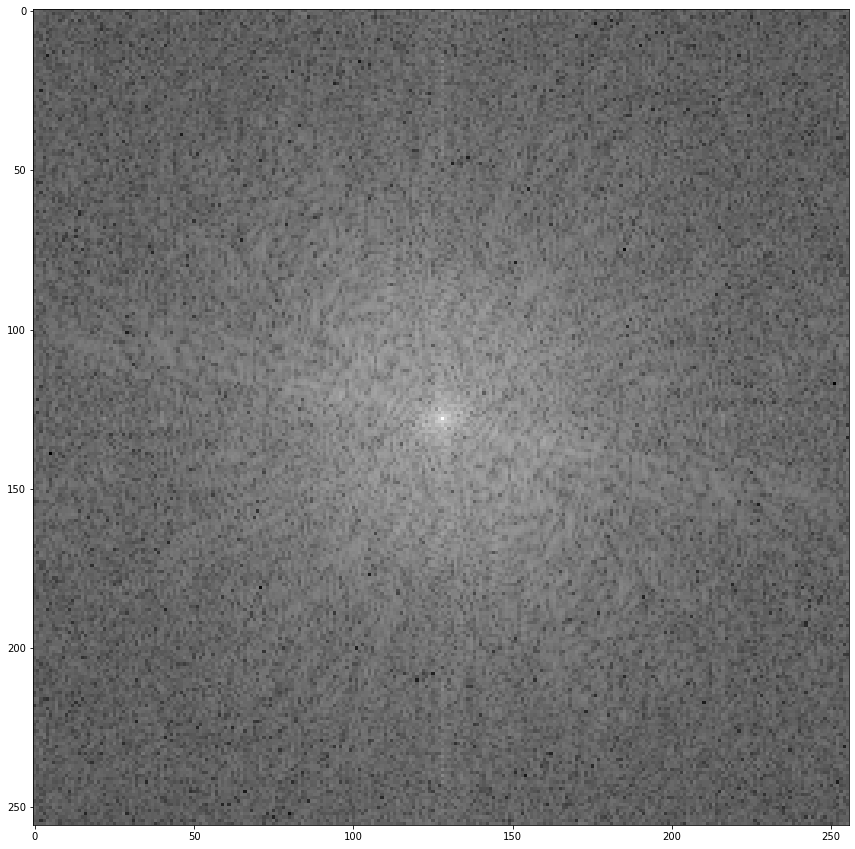

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


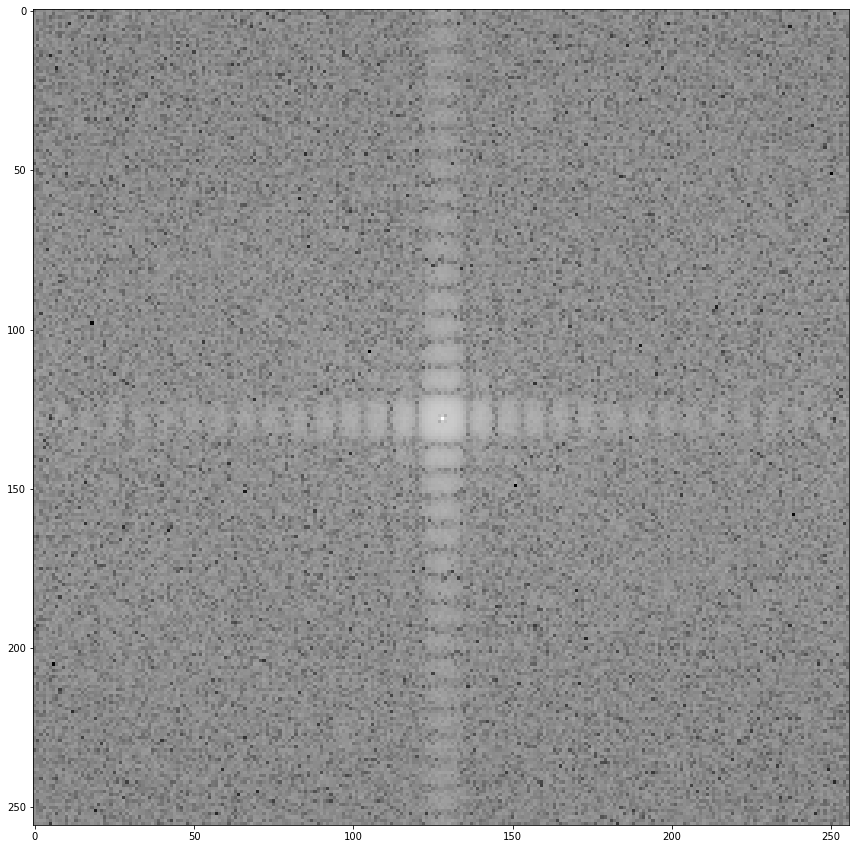

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


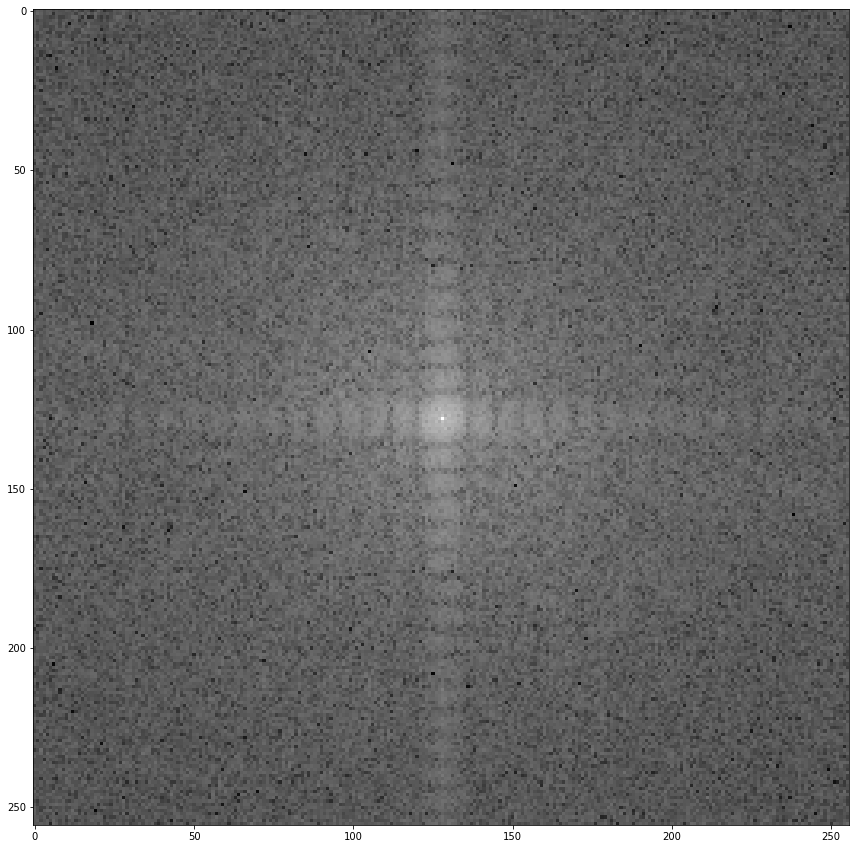

In [ ]:
from scipy import ndimage, misc, signal, fftpack

import matplotlib.pylab as pylab
import numpy.fft as fp
import numpy as np

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.sttd(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/book_image/butterfly.bmp", 0)
freq = fp.fft2(img) ##
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
(w, h) = freq.shape
half_w, half_h = w//2, h//2
n = 15
freq2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0
gauss_kernel = (20 * np.log10(0.1 + freq2)).astype(int) ##
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq * freq_kernel
img1 = fp.ifft2(fftpack.ifftshift(freq2)).real
img2 = np.clip(img1, 0, 255)

mag1 = 20 * np.log10(0.1 + fp.fftshift(freq))
mag2 = 20 * np.log10(0.1 + fp.fftshift(freq_kernel))
mag3 = 20 * np.log10(0.1 + fp.fftshift(convolved))

pylab.figure(figsize=(20, 15)), pylab.gray()
pylab.plot(), pylab.imshow(img)
pylab.show()
pylab.figure(figsize=(20, 15)), pylab.gray()
pylab.plot(), pylab.imshow(gauss_kernel)
pylab.show()
pylab.figure(figsize=(20, 15)), pylab.gray()
pylab.plot(), pylab.imshow(img1)
pylab.show()
pylab.figure(figsize=(20, 15)), pylab.gray()
pylab.plot(), pylab.imshow(mag1.astype(int))
pylab.show()
pylab.figure(figsize=(20, 15)), pylab.gray()
pylab.plot(), pylab.imshow(mag2.astype(int))
pylab.show()
pylab.figure(figsize=(20, 15)), pylab.gray()
pylab.plot(), pylab.imshow(mag3.astype(int))
pylab.show()
